# Eric Kofoid
# Assignment 2

In [1]:
library(fpp)

Loading required package: forecast
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 

Loading required package: fma
Loading required package: tseries
Loading required package: expsmooth
Loading required package: lmtest


## QUESTION 1
### 1a)
* bricksq - First off just seasonplotting all the years is very difficult to read. I had to chunk it down a little in order to see anything. For the most part, I see an increase from Q1 to Q3 then a decrease in Q4.

* writing - Definitely a huge descrease in Aug which I believe in France is vacation month. (I assume this data is French since the description says it is in francs). There are some ups in March, June, October, & December. This data is very seasonal.

* fancy - this is cool data. March has a nice little up, then goes down to May then steadily up to Oct where real tourist season begins

### 1b)
* bricksq - 60's are pretty consistent. 74 & 82 took a nose dive

* writing - 74 had a nice big jump at the end of the year

* fancy - 90 had a decrease from 89, but the rest increased, from 91-93 there were major increases YOY during the tourist season. Weird how all of Jan was relatively same YOY.

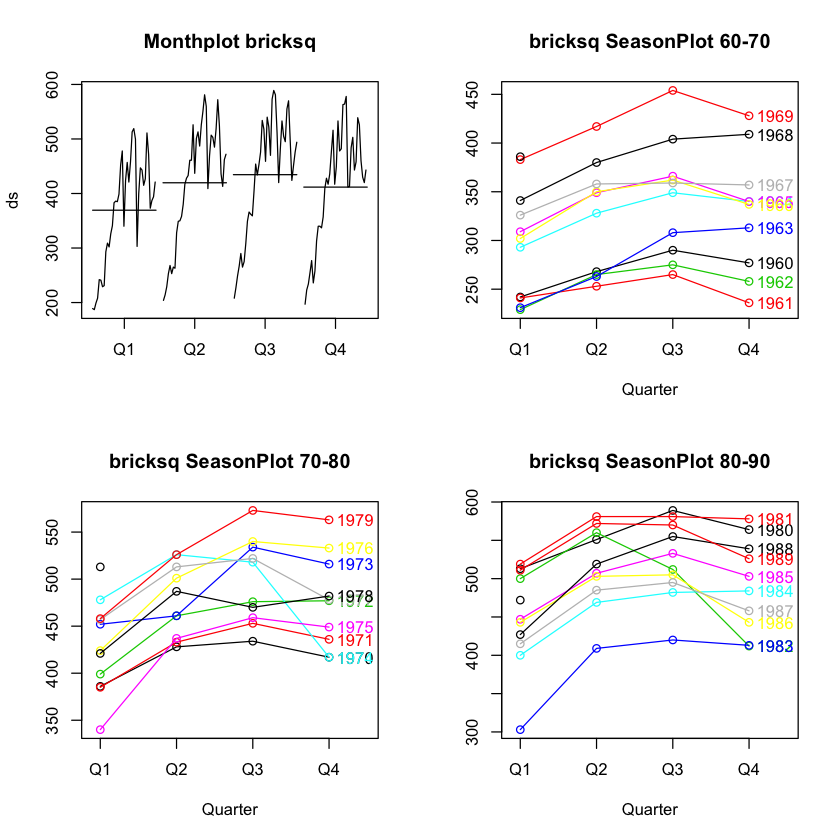

In [2]:
ds = bricksq
default_par <- par()
par(mfrow=c(2,2))
#plot(ds, main="Regular plot of bricksq")
monthplot(ds, main="Monthplot bricksq")
seasonplot(window(ds, start=1960, end=1970), year.labels=TRUE, col=1:10, main="bricksq SeasonPlot 60-70")
seasonplot(window(ds, start=1970, end=1980), year.labels=TRUE, col=1:10, main="bricksq SeasonPlot 70-80")
seasonplot(window(ds, start=1980, end=1990), year.labels=TRUE, col=1:10, main="bricksq SeasonPlot 80-90")

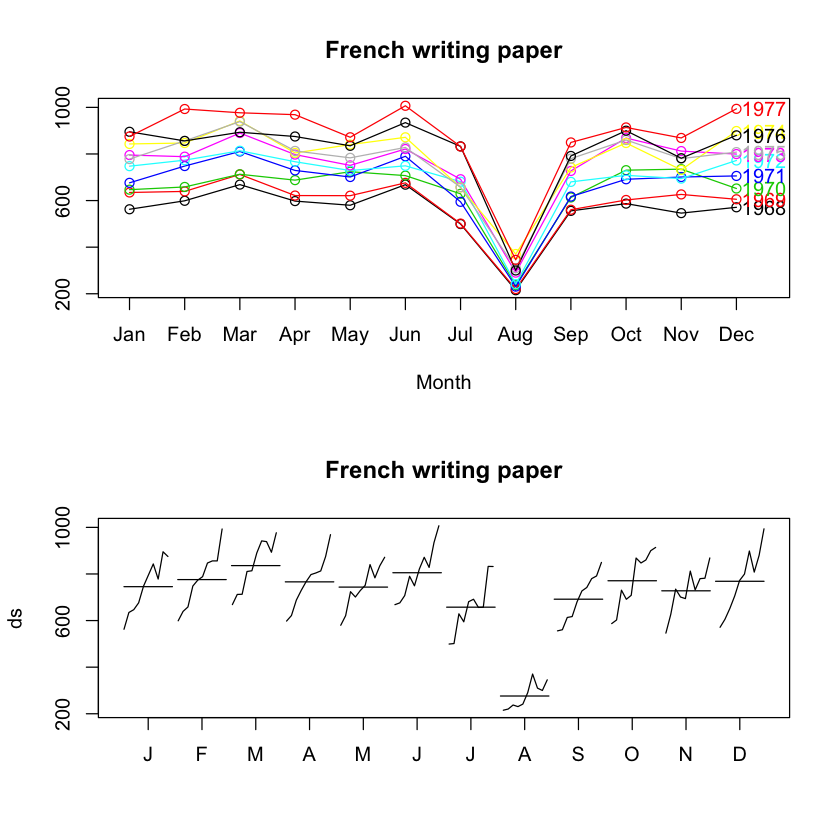

In [3]:
ds = writing
par(mfrow=c(2,1))
#plot(writing, main="Regular plot of French writing paper")
seasonplot(ds, year.labels=TRUE, col=1:10, main="French writing paper")
monthplot(ds, main="French writing paper")

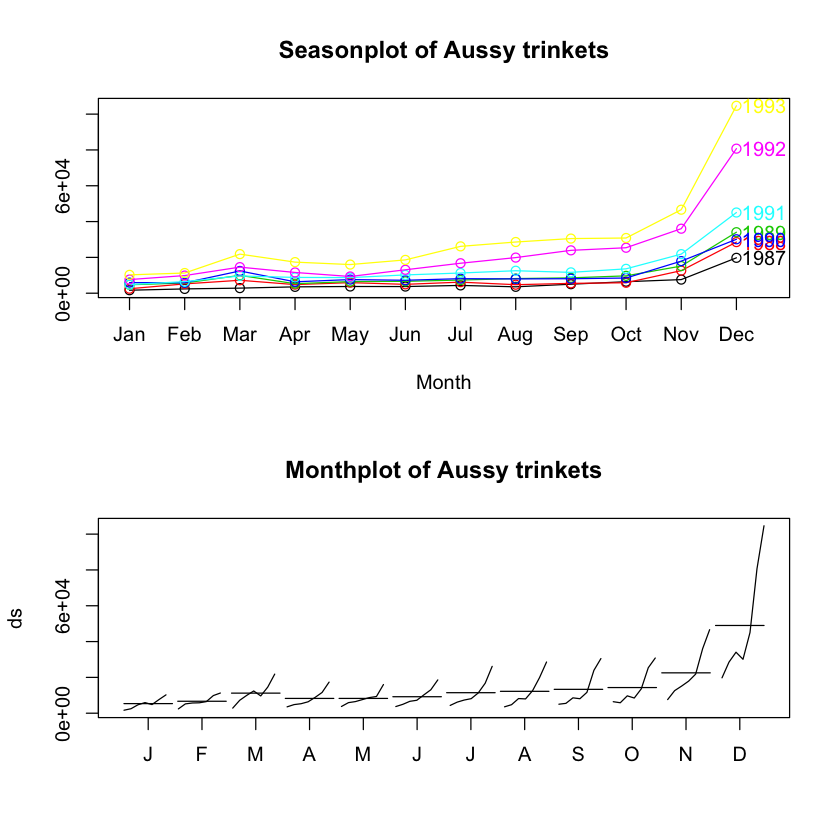

In [4]:
ds = fancy
par(mfrow=c(2,1))
#plot(fancy, main="Regular plot of Aussy trinkets")
seasonplot(ds, year.labels=TRUE, col=1:10, main="Seasonplot of Aussy trinkets")
monthplot(ds, main="Monthplot of Aussy trinkets")

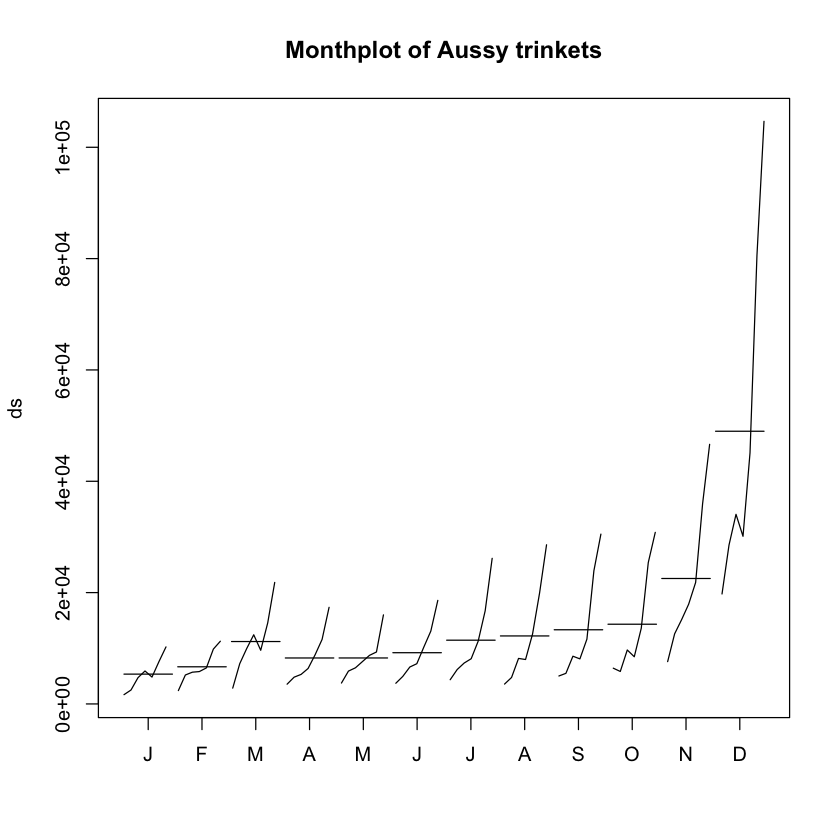

In [5]:
monthplot(ds, main="Monthplot of Aussy trinkets")

## QUESTION 2
I am not going to output each individual tsdisplay, I will just show one


1. bicoal - yearly data
    * Seasonality = there is a spike at the 12 year point which may indicate 12 year seasonality, but there just seems weird, I don't think of years as being seasonal
    * Trend - there seems to be a trend of down, then back up
    * Cycle - 
2. bricksq - quarterly data
    * Seasonality - there is a spike in lag 4 (Q4) which indicates seasonality
    * Trend - because all those lag spikes are slowly decreasing there looks like there is an upward trend YOY
    * Cycle - since all the lags are fairly correlated there doesn't seem to be any cycles going on here
3. hsales - monthly data
    * Seasonality - yep, each 12 months have a fairly high correlation, which indicates seasonality
    * Trend - each 12 month lag has a downward trend indicating that YOY we are seeing growth
    * Cycle - there are some cycles in here, we see down, up, down, up, down up. and the downs keep getting deeper
4. ibmclose - daily
    * Seasonality - daily data makes it difficult to see any seasonality in the Acf since we would need way too many lags
    * Trend - there is a downward trend
    * Cycle - no cycles from this small Acf
5. internet - minutes (I changed the lag.max to 100 and included the diagrams)
    * Seasonality - I don't think we can really infer anything from level of data
    * Trend - 
    * Cycle - there seems to be cycles here (or is it just the Loc Ness Monster?)
6. writing
    * Seasonality - definitely here every year
    * Trend - the 12 month spikes are slowly decreasing
    * Cycle - I guess there is a yearly cycle of down at beginning then back up

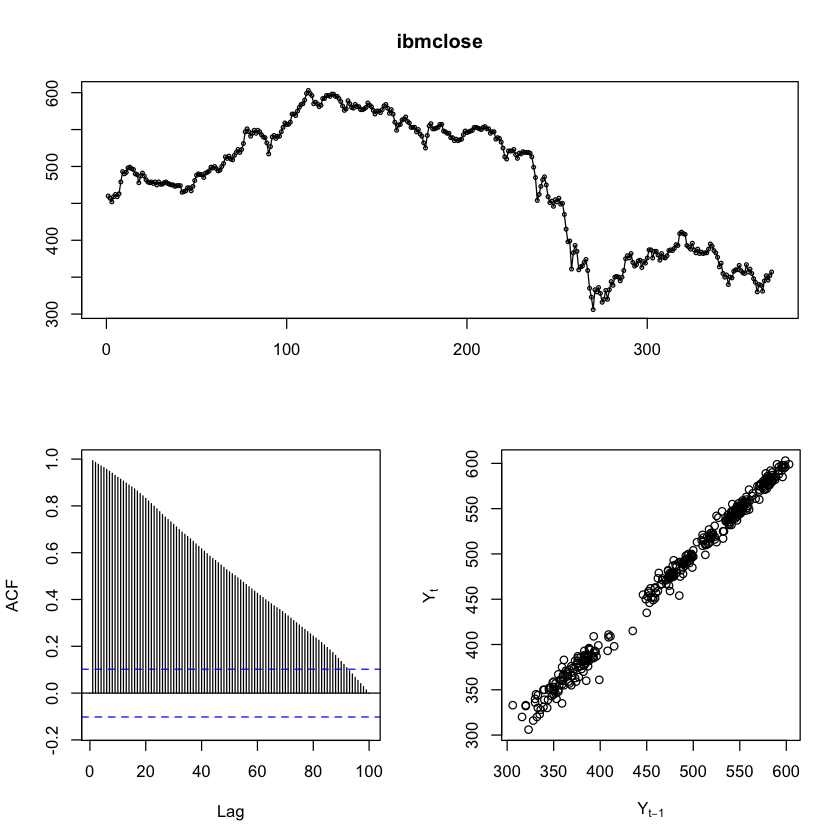

In [6]:
tsdisplay(ibmclose, plot.type="scatter", lag.max=100)

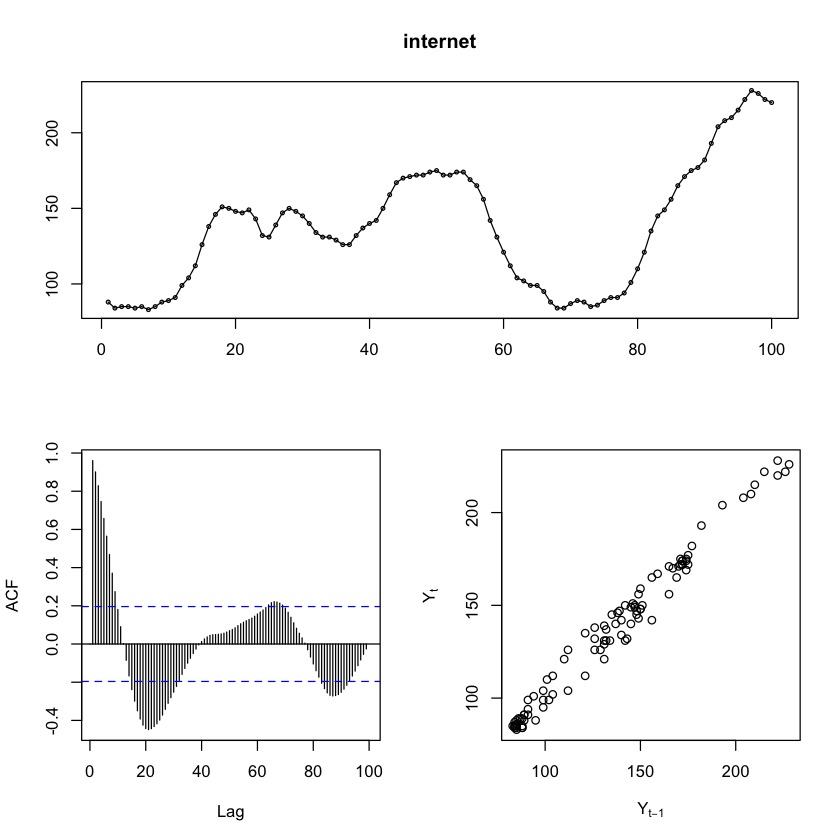

In [7]:
tsdisplay(internet, plot.type="scatter", lag.max=100)

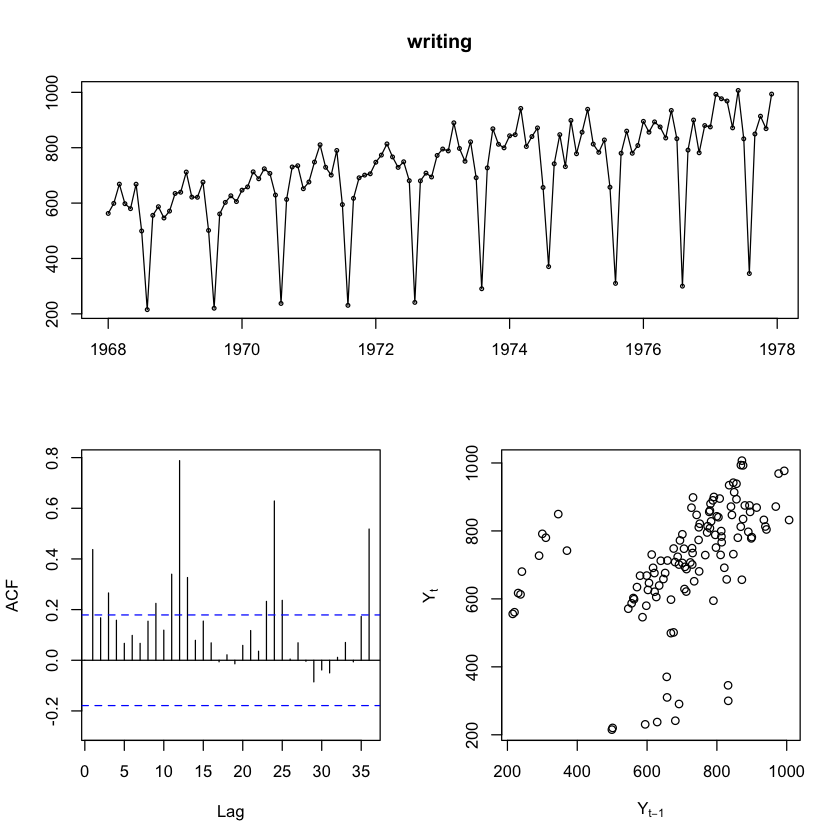

In [8]:
tsdisplay(writing, plot.type="scatter")

## QUESTION 3

### 3a)

In [9]:
naive_ibm = naive(ibmclose)

### 3b)
The residuals do not appear to be white noise since we have some lags out of CI range. It missed the fact that there are clearly trends in this data.

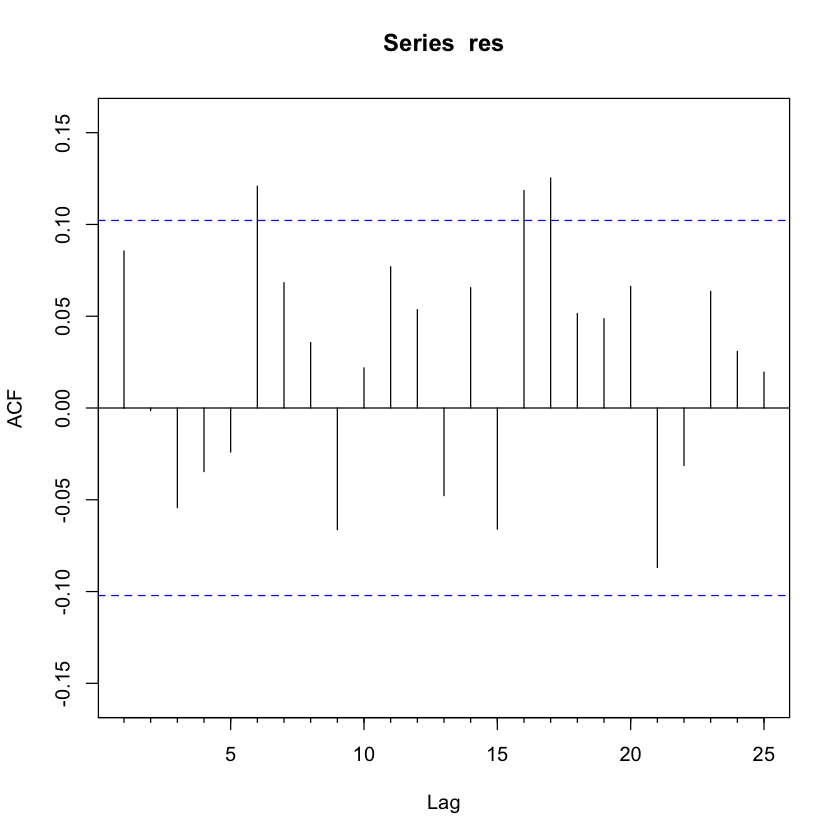

In [10]:
res = residuals(naive_ibm)
Acf(res)

### 3c)
Since the p-value > .05, we fail to reject the null hypo of the residuals being white noise. Which means there is some information still left in this that needs to be discovered

In [11]:
Box.test(res, lag=10, fitdf=0, type="Lj")


	Box-Ljung test

data:  res
X-squared = 14.064, df = 10, p-value = 0.1701


## QUESTION 4

### 4a)
There is seasonality here, each mid year we see a spike in sales
There is also a trend here, each year we are seeing growth from the previous year

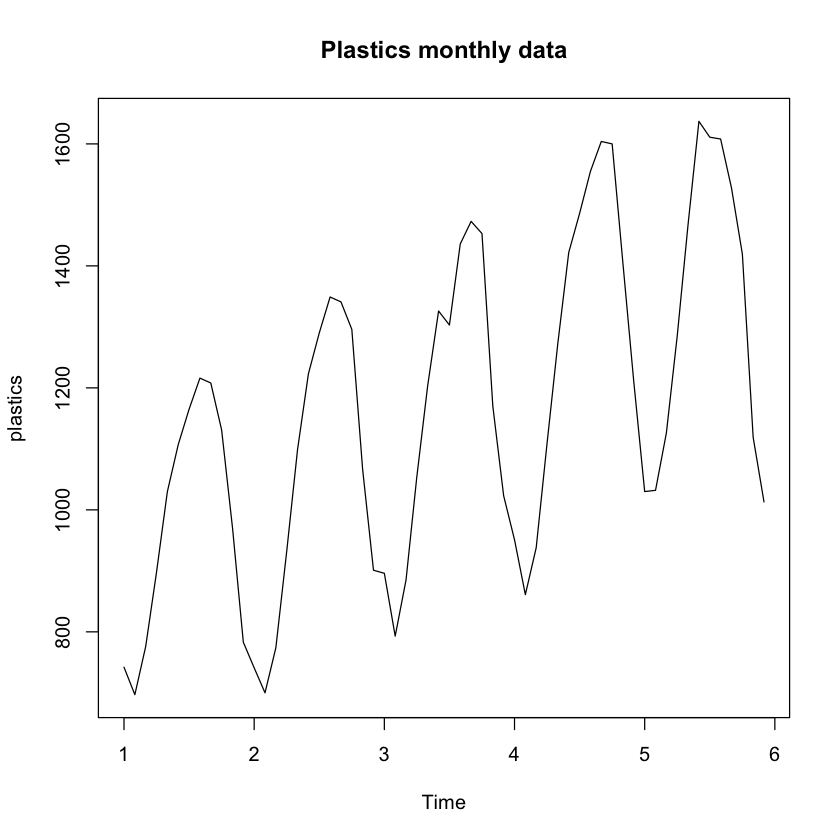

In [12]:
plot(plastics, main="Plastics monthly data")

### 4b)
Changing the s.window to large number, didn't really make a change on the seasonality. But changing it to a small number changed the trend

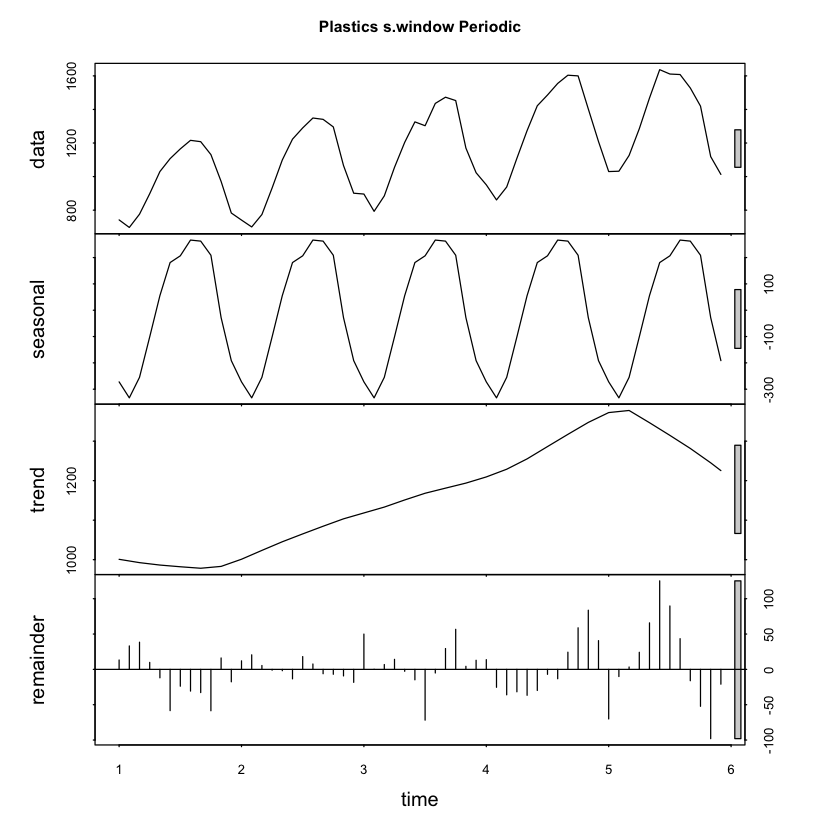

In [13]:
plastics_stl = stl(plastics, s.window="periodic")
plot(plastics_stl, main="Plastics s.window Periodic")

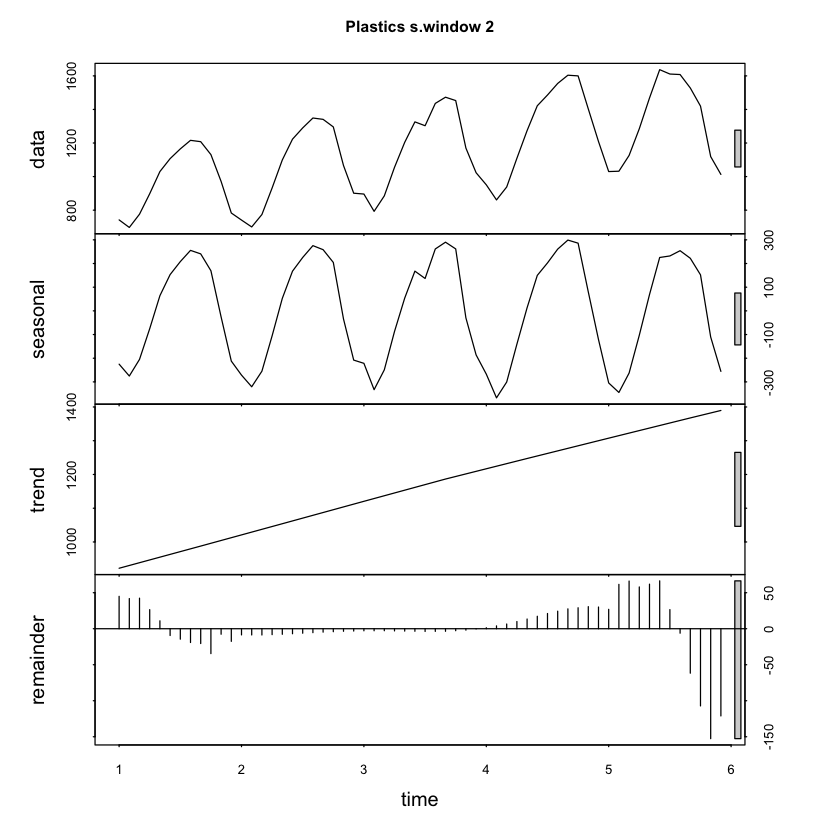

In [14]:
plastics_stl2 = stl(plastics, s.window=2)
plot(plastics_stl2, main="Plastics s.window 2")

### 4c)
Yes, the results of the stl support what I saw in the plot. The Seasonality is mid year, and the trend is upward.

### 4d)
The seasonally adjusted dataset has a much less drastic seasonality and the trend is more observable.

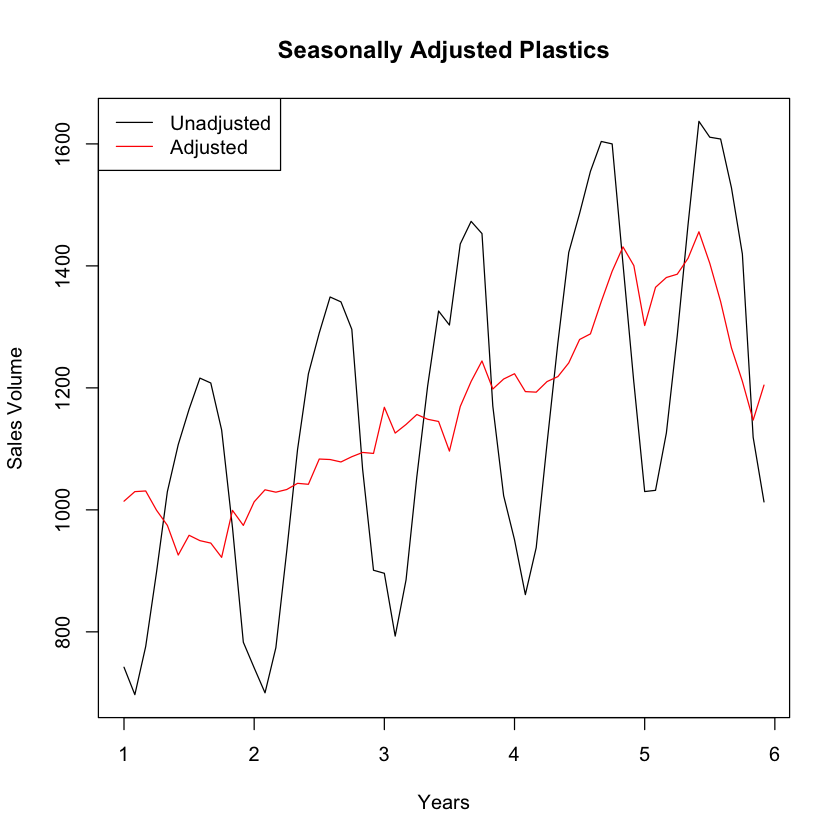

In [15]:
# Putting Seasonally Adjusted data into "plastics_sa" will be reused in 4h
plastics_sa = seasadj(plastics_stl)

plot(plastics, main="Seasonally Adjusted Plastics", ylab="Sales Volume", xlab="Years")
lines(plastics_sa, col="red")
legend("topleft", legend=c('Unadjusted', 'Adjusted'), col=c("black", "red"), lty=c(1,1))

### 4e)
I changed the 18th observation, which is right before year 2's seasonal peak.
The outlier makes the smoothing effect go away. Just prior to the actual season it descreases by a bit and then recovers at the end of the season. It didn't affect the overall trend though.

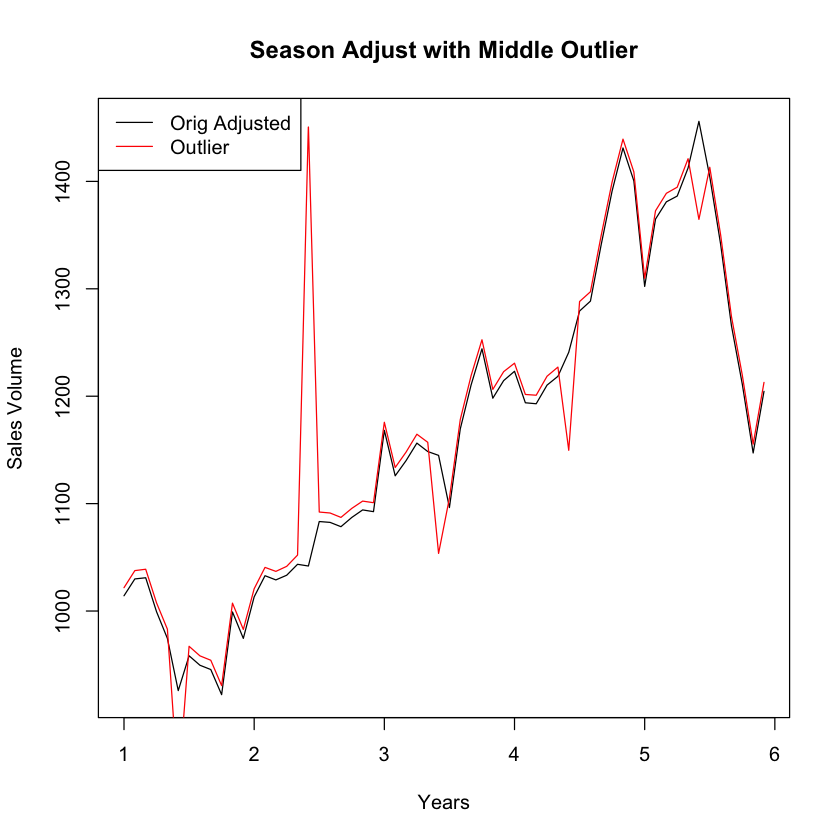

In [16]:
plastics_midout = plastics
plastics_midout[18] = plastics_midout[18] + 500
plastics_midout_stl = stl(plastics_midout, s.window="periodic")
plastics_midout_sa = seasadj(plastics_midout_stl)
plot(plastics_sa, main="Season Adjust with Middle Outlier", ylab="Sales Volume", xlab="Years")
lines(plastics_midout_sa, col="red")
legend("topleft", legend=c('Orig Adjusted', 'Outlier'), col=c("black", "red"), lty=c(1,1))

### 4f)
Using the robust feature does make it look like the original adjusted, except for the outlier. I guess what it is doing is checking for outliers and only taking them into account at the actual point of the outlier.

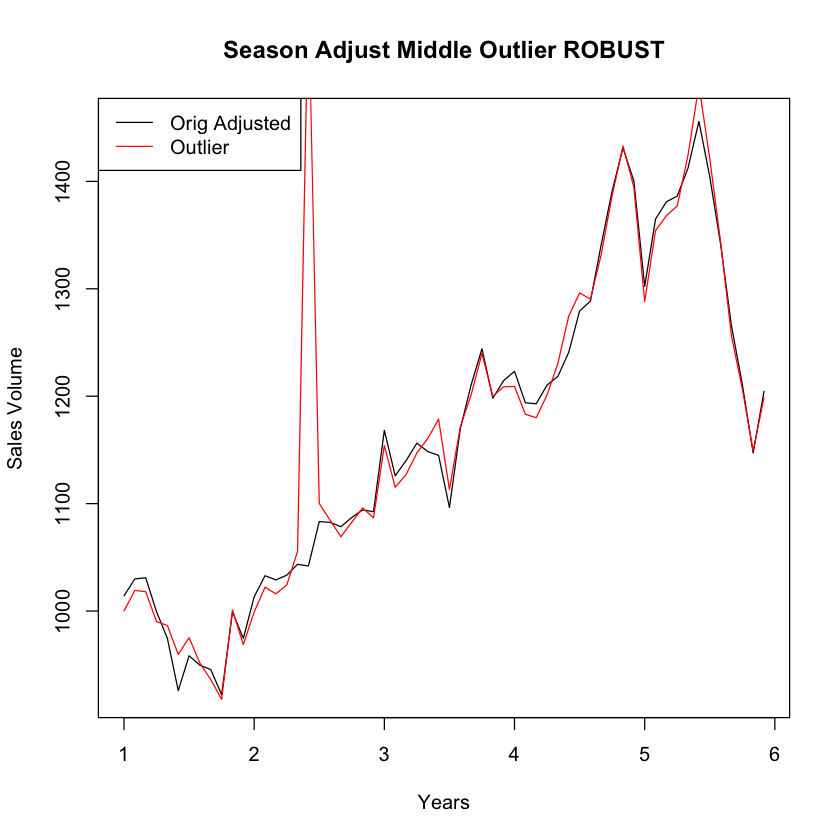

In [17]:
plastics_robust_stl = stl(plastics_midout, s.window="periodic", robust="TRUE")
plastics_robust_sa = seasadj(plastics_robust_stl)
plot(plastics_sa, main="Season Adjust Middle Outlier ROBUST", ylab="Sales Volume", xlab="Years")
lines(plastics_robust_sa, col="red")
legend("topleft", legend=c('Orig Adjusted', 'Outlier'), col=c("black", "red"), lty=c(1,1))

### 4g)
Based on these plots, the outlier in the middle with Robust does the best job of handling the outlier. The ROBUST follows the original shape of the adjusted with the exception of the actual outlier. With the outlier on the outside there are more dips.

In [18]:
# Change outlier
plastics_outout = plastics
plastics_outout[58] = plastics_outout[58] + 500
plastics_outout_stl = stl(plastics_outout, s.window="periodic")
plastics_outout_sa = seasadj(plastics_outout_stl)

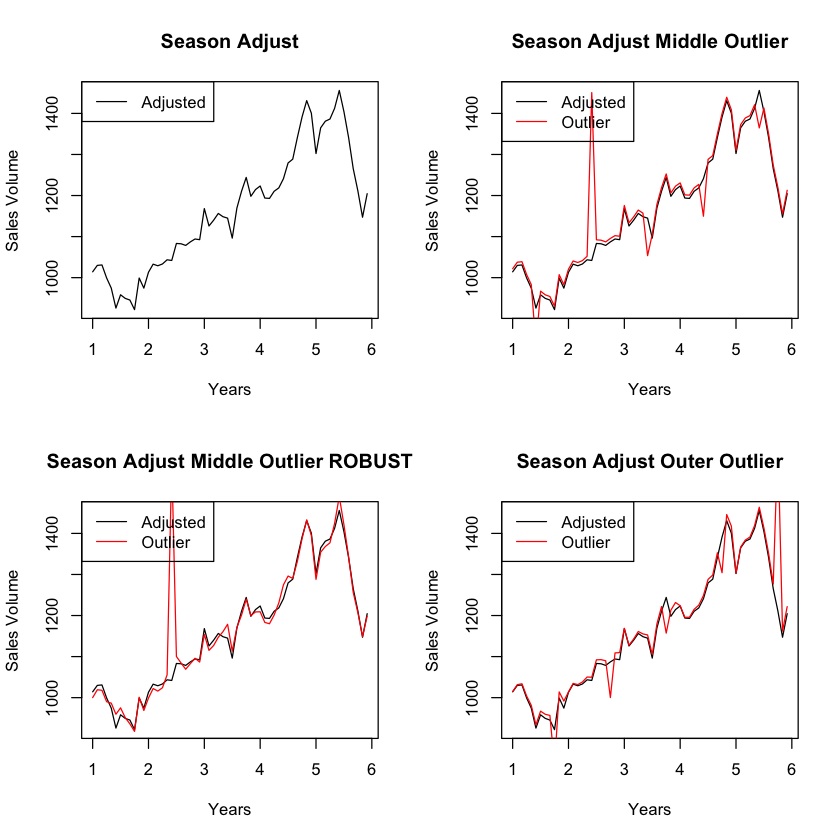

In [19]:
par(mfrow=c(2,2))
plot(plastics_sa, main="Season Adjust", ylab="Sales Volume", xlab="Years")
legend("topleft", legend=c('Adjusted'), col=c("black"), lty=c(1))

plot(plastics_sa, main="Season Adjust Middle Outlier", ylab="Sales Volume", xlab="Years")
lines(plastics_midout_sa, col="red")
legend("topleft", legend=c('Adjusted', 'Outlier'), col=c("black", "red"), lty=c(1,1))

plot(plastics_sa, main="Season Adjust Middle Outlier ROBUST", ylab="Sales Volume", xlab="Years")
lines(plastics_robust_sa, col="red")
legend("topleft", legend=c('Adjusted', 'Outlier'), col=c("black", "red"), lty=c(1,1))

plot(plastics_sa, main="Season Adjust Outer Outlier", ylab="Sales Volume", xlab="Years")
lines(plastics_outout_sa, col="red")
legend("topleft", legend=c('Adjusted', 'Outlier'), col=c("black", "red"), lty=c(1,1))

### 4h)
Based on the accuracy matrix of numbers, the model on the original dataset did a better job. I think this makes sense, because I used the Seasonal forecasting model. The adjusted data smooths out the seasonality out of the data, making it more difficult to forecast accurately.

In [20]:
# train/test split on original dataset
train = window(plastics, start=c(1, 1), end=c(5, 1))
test = window(plastics, start=c(5, 1))

# train/test split on the seasonal adjusted dataset
train_sa = window(plastics_sa, start=c(1, 1), end=c(5, 1))
test_sa = window(plastics_sa, start=c(5, 1))

# forecast using Seasonal model for both datasets
train_seasonal = snaive(train, h=12)
train_seasonal_sa = snaive(train_sa, h=12)

Warning message:
In xy.coords(x = matrix(rep.int(tx, k), ncol = k), y = x, log = log): NAs introduced by coercionWarning message:
In xy.coords(x, y): NAs introduced by coercion

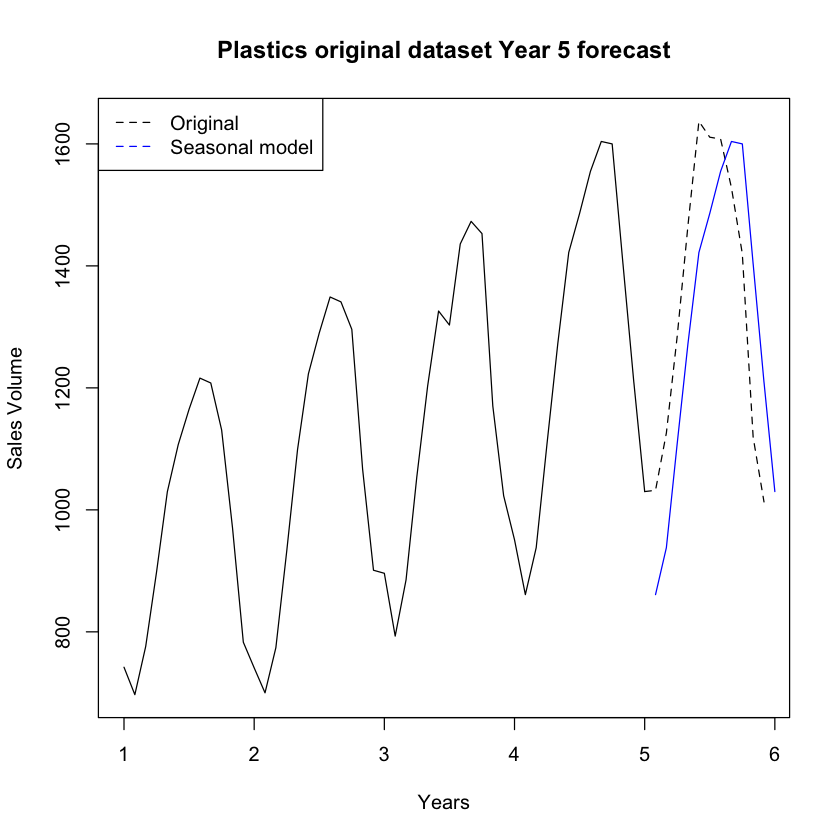

In [21]:
# Plot orginal dataset
ts.plot(
    train
    , test
    , plot.type="single"
    , lty=c(1:2)
    , main="Plastics original dataset Year 5 forecast"
    , ylab="Sales Volume"
    , xlab="Years")

lines(train_seasonal$mean, col="blue")
legend("topleft", legend=c("Original", "Seasonal model"), col=c("black", "blue"), lty=c(2:2))

Warning message:
In xy.coords(x = matrix(rep.int(tx, k), ncol = k), y = x, log = log): NAs introduced by coercionWarning message:
In xy.coords(x, y): NAs introduced by coercion

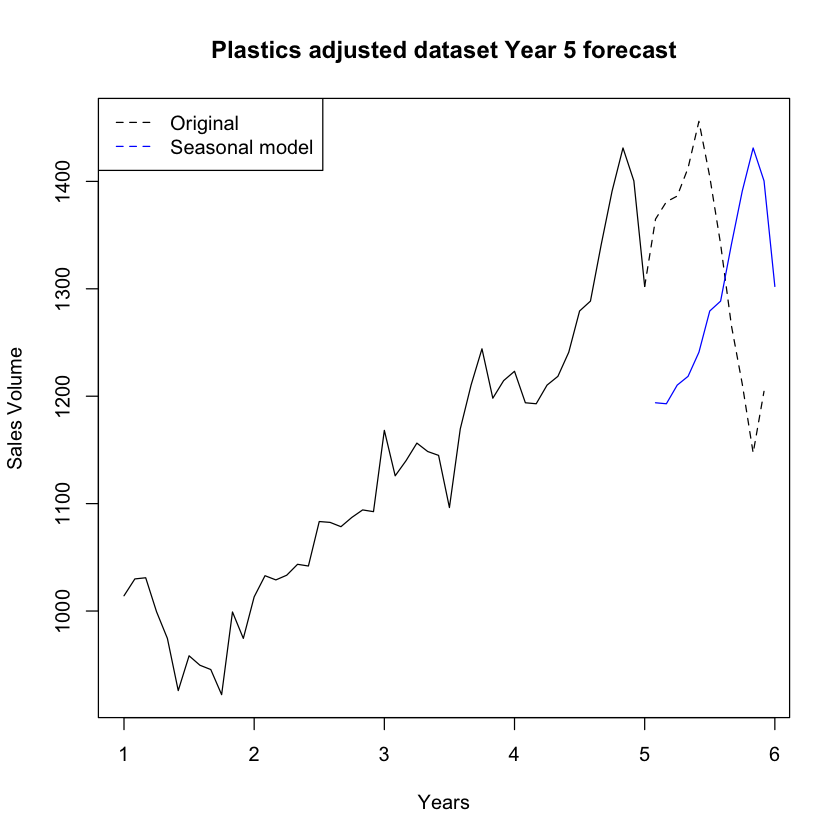

In [22]:
#Plot seasonally adjusted dataset
ts.plot(
    train_sa
    , test_sa
    , plot.type="single"
    , lty=c(1:2)
    , main="Plastics adjusted dataset Year 5 forecast"
    , ylab="Sales Volume"
    , xlab="Years")

lines(train_seasonal_sa$mean, col="blue")
legend("topleft", legend=c("Original", "Seasonal model"), col=c("black", "blue"), lty=c(2:2))

In [23]:
print("ORIGINAL")
accuracy(train_seasonal, test)

[1] "ORIGINAL"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,101.81081,114.7110,101.9730,8.498316,8.519579,1.00000,0.5802402,NA
Test set,35.09091,179.6724,168.9091,1.998964,13.340446,1.65641,0.8062219,1.258873


In [24]:
print("ADJUSTED")
accuracy(train_seasonal_sa, test)

[1] "ADJUSTED"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,101.81081,114.7110,101.9730,8.509246,8.525088,1.000000,0.5802402,NA
Test set,59.83661,261.2351,228.6598,1.264506,17.225336,2.242357,0.6490821,1.758358


## QUESTION 5

In [25]:
# read in the csv file
ds <- read.csv("pigs.csv", sep=",", header=TRUE)

# use zoo to convert the date "YYYY-MM" to a date
pigzoo <- read.zoo(ds, sep=",", FUN=as.yearmon)

# us ts to convert the zoo object to ts object using the correct intervals
pigs = ts(pigzoo, frequency=12, start=c(1980,1), end=c(1995, 8))

### 5a)
* Trend - for the most part increases, except for a big down swing from 1985 to 1988 (not due to swine flu)
* Seasonality - definitely
* Cycle - there could be a cycle in here, would be able to see if I had more data

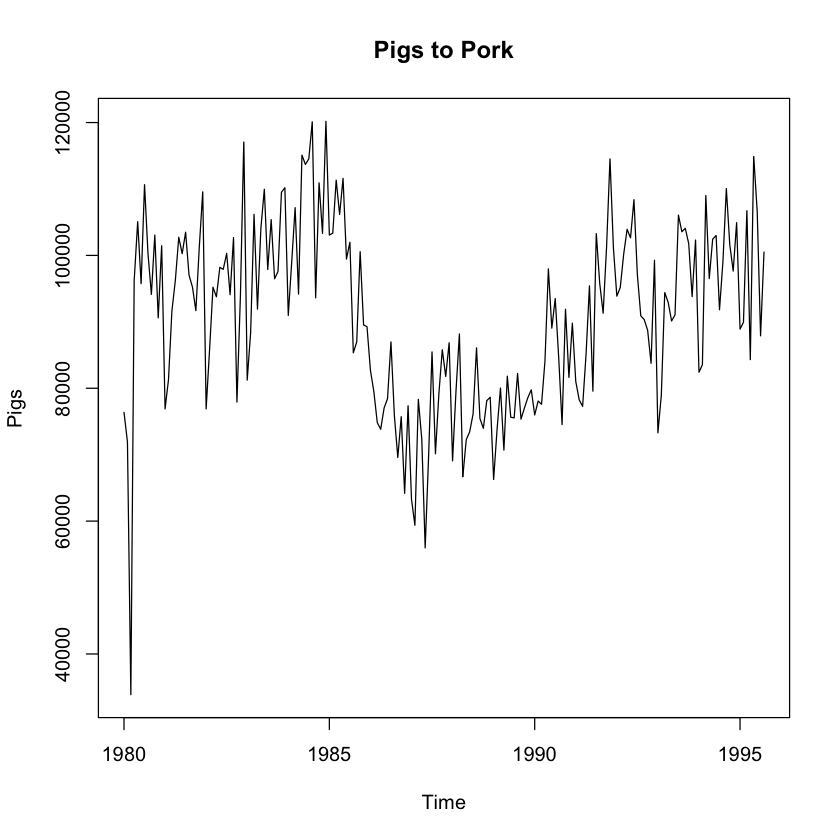

In [26]:
plot(pigs, main="Pigs to Pork", xlab="Time", ylab="Pigs")

### 5b)

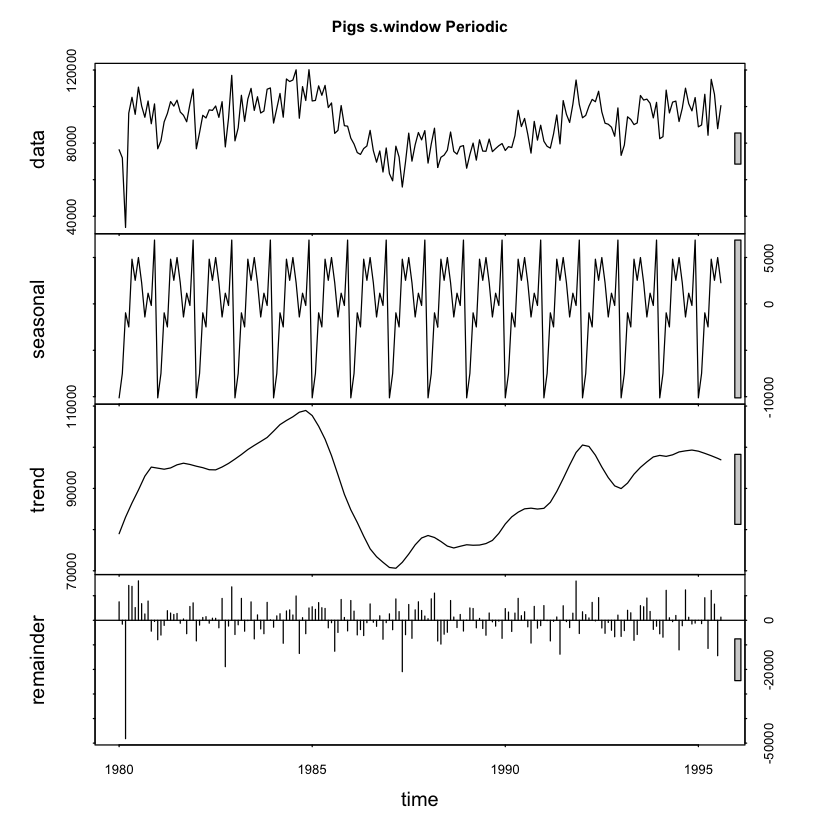

In [27]:
pigs_stl = stl(pigs, s.window="periodic")
plot(pigs_stl, main="Pigs s.window Periodic")

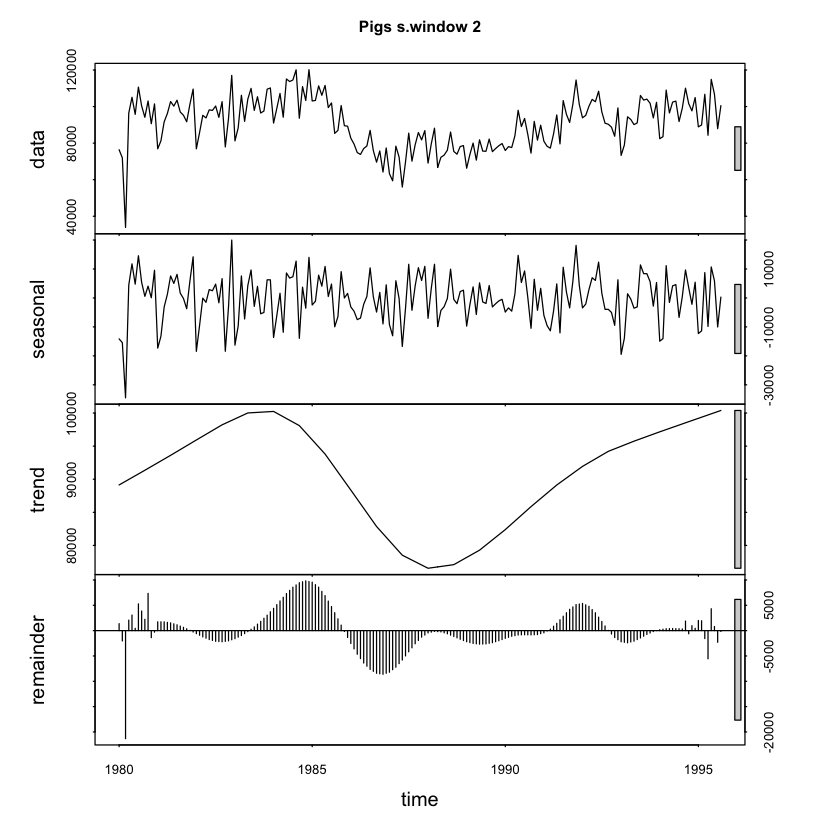

In [28]:
#pigs_stl = stl(pigs, s.window=2)
plot(stl(pigs, s.window=2), main="Pigs s.window 2")

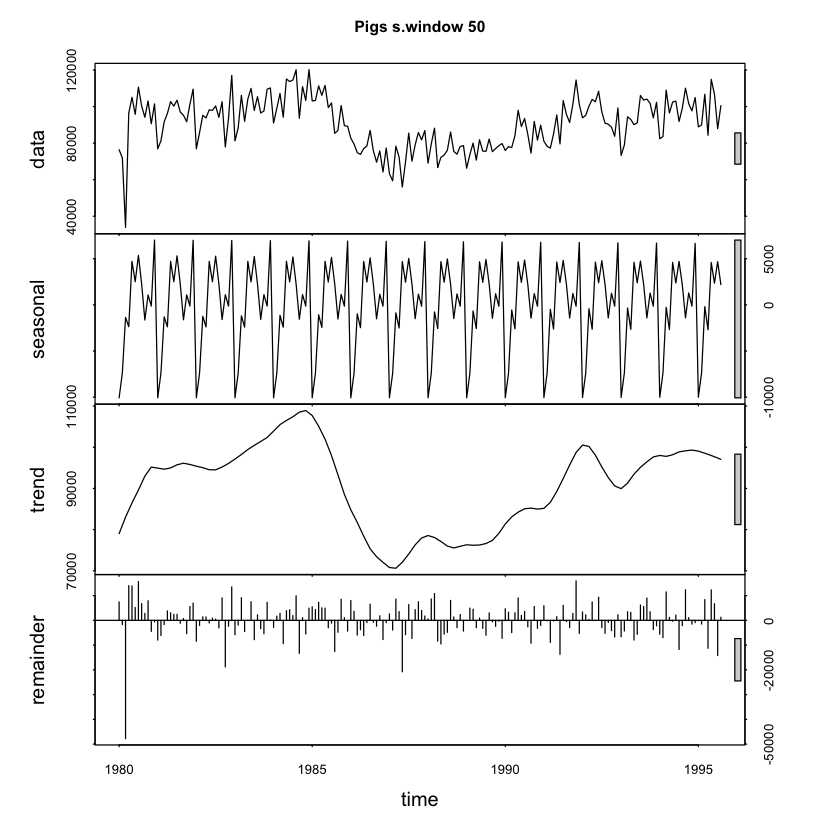

In [29]:
plot(stl(pigs, s.window=50), main="Pigs s.window 50")

### 5c)
Yes the STL supports what I thought I saw. Seasonality and a trend.

### 5d)
Doing the seasonal adjustment on the "periodic" stl doesn't really show any change. In fact I think it gets worse.
I am going to use the s.window = 2 to make the seasonal adjustment smoother.

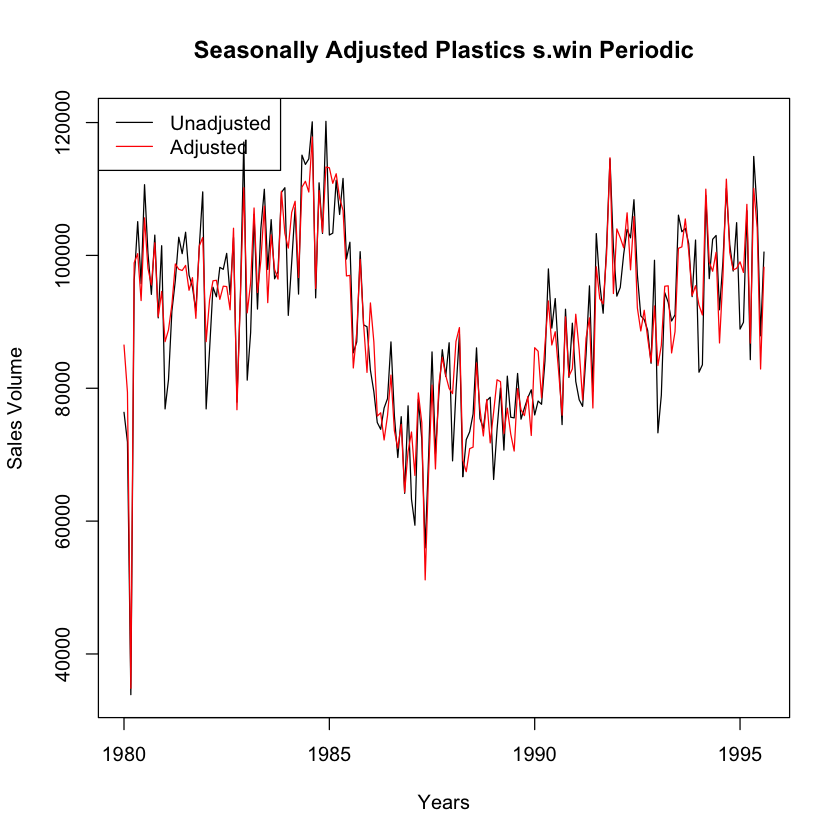

In [30]:
pigs_sa = seasadj(pigs_stl)

plot(pigs, main="Seasonally Adjusted Plastics s.win Periodic", ylab="Sales Volume", xlab="Years")
lines(pigs_sa, col="red")
legend("topleft", legend=c('Unadjusted', 'Adjusted'), col=c("black", "red"), lty=c(1,1))

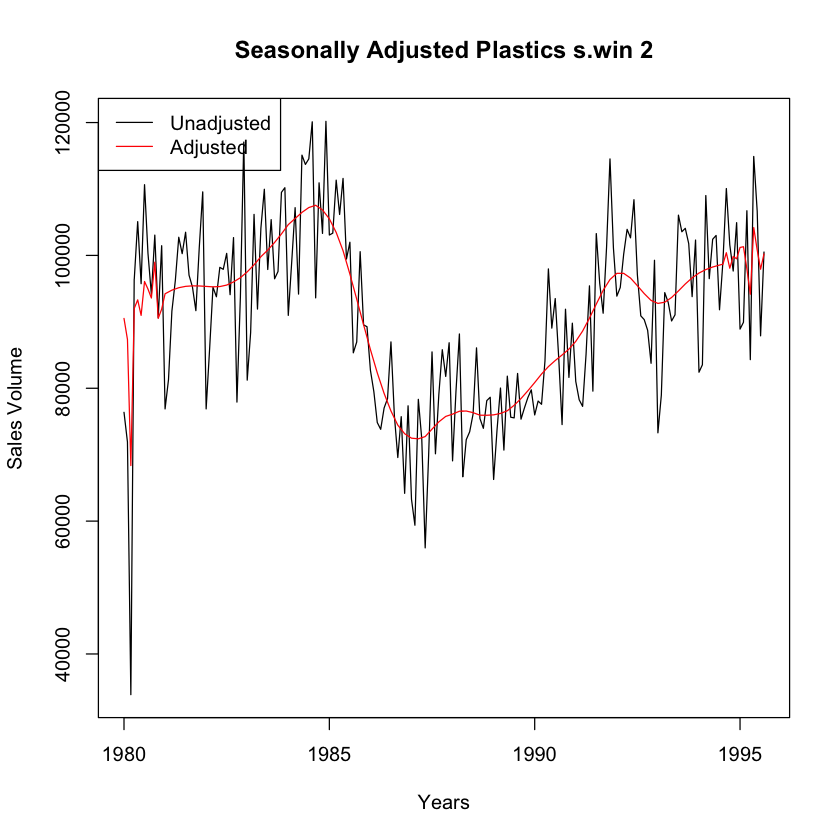

In [31]:
pigs_stl = stl(pigs, s.window=2)
pigs_sa = seasadj(pigs_stl)

plot(pigs, main="Seasonally Adjusted Plastics s.win 2", ylab="Sales Volume", xlab="Years")
lines(pigs_sa, col="red")
legend("topleft", legend=c('Unadjusted', 'Adjusted'), col=c("black", "red"), lty=c(1,1))

### 5e)
The outlier in the middle really only affects that area.

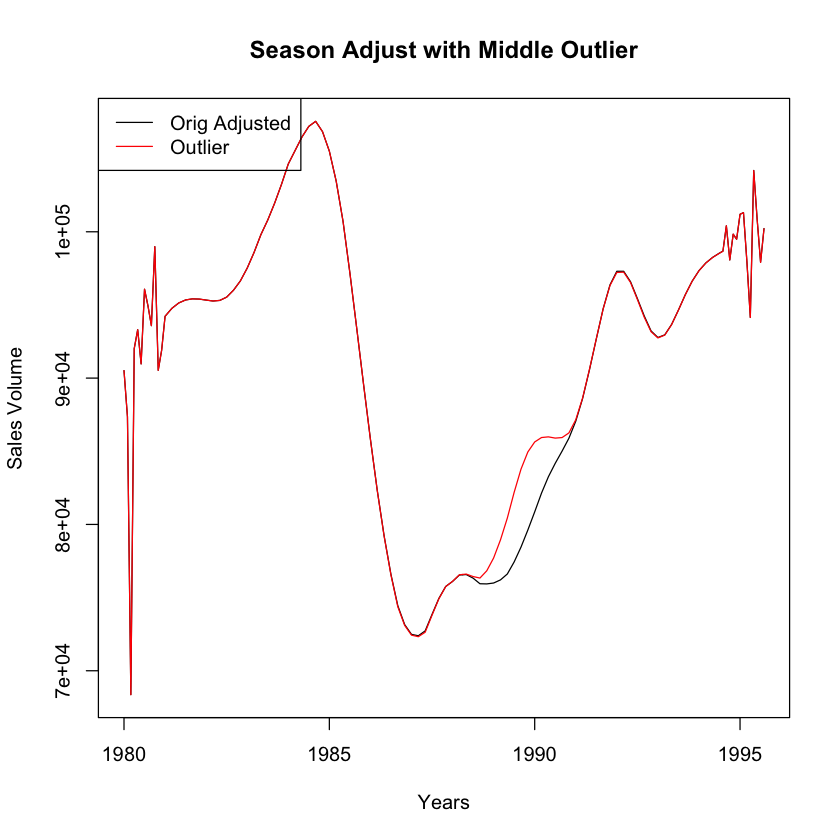

In [32]:
pigs_midout = pigs
pigs_midout[118] = pigs_midout[118] + pigs_midout[118]
pigs_midout_stl = stl(pigs_midout, s.window=2)
pigs_midout_sa = seasadj(pigs_midout_stl)
plot(pigs_sa, main="Season Adjust with Middle Outlier", ylab="Sales Volume", xlab="Years")
lines(pigs_midout_sa, col="red")
legend("topleft", legend=c('Orig Adjusted', 'Outlier'), col=c("black", "red"), lty=c(1,1))

### 5f)
Robust with the outlier actually causes it to get worse. The peaks and valleys get further away from the actual.

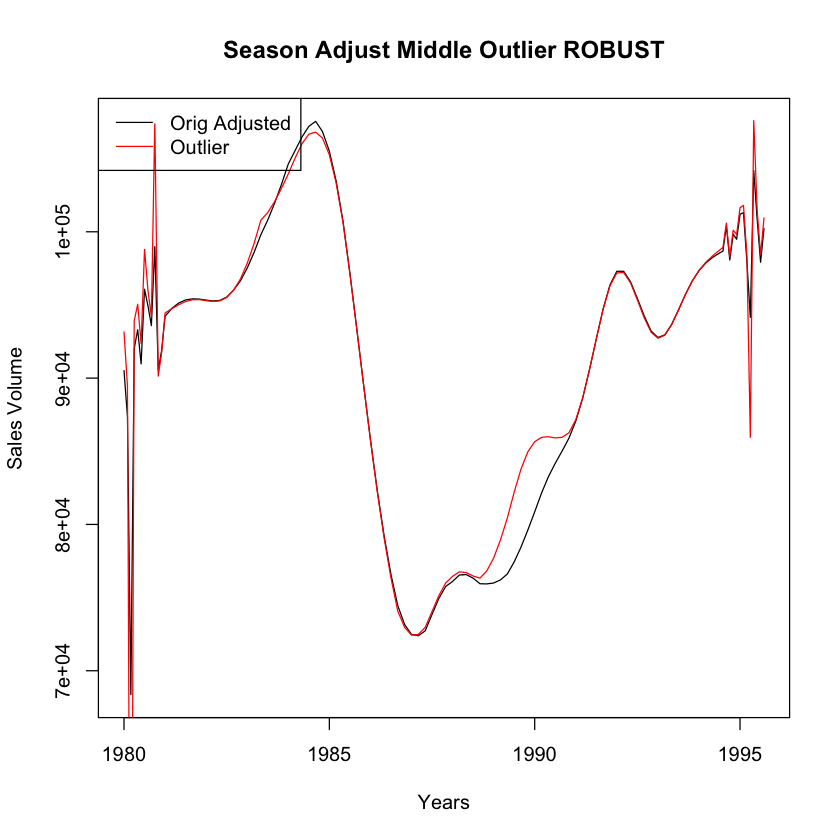

In [33]:
pigs_robust_stl = stl(pigs_midout, s.window=2, robust="TRUE")
pigs_robust_sa = seasadj(pigs_robust_stl)
plot(pigs_sa, main="Season Adjust Middle Outlier ROBUST", ylab="Sales Volume", xlab="Years")
lines(pigs_robust_sa, col="red")
legend("topleft", legend=c('Orig Adjusted', 'Outlier'), col=c("black", "red"), lty=c(1,1))

### 5g)
An outside outlier only affects the local area. Seems like outliers don't cause too much of a problem in this data.

In [34]:
# Change outlier
pigs_outout = pigs
pigs_outout[186] = pigs_outout[186] + pigs_outout[186]
pigs_outout_stl = stl(pigs_outout, s.window=2)
pigs_outout_sa = seasadj(pigs_outout_stl)

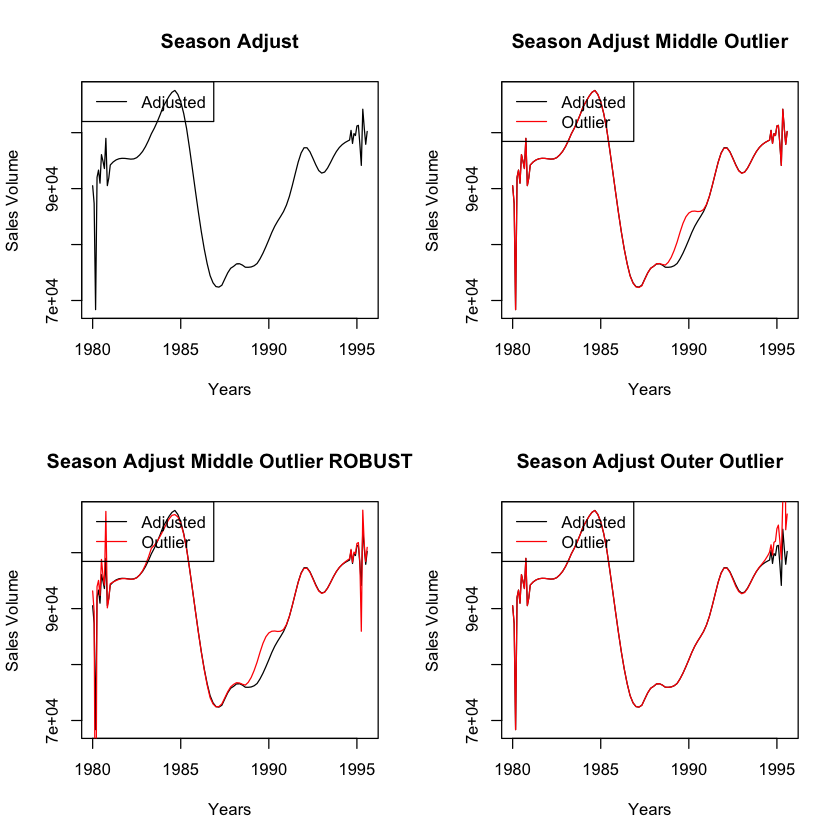

In [35]:
par(mfrow=c(2,2))
plot(pigs_sa, main="Season Adjust", ylab="Sales Volume", xlab="Years")
legend("topleft", legend=c('Adjusted'), col=c("black"), lty=c(1))

plot(pigs_sa, main="Season Adjust Middle Outlier", ylab="Sales Volume", xlab="Years")
lines(pigs_midout_sa, col="red")
legend("topleft", legend=c('Adjusted', 'Outlier'), col=c("black", "red"), lty=c(1,1))

plot(pigs_sa, main="Season Adjust Middle Outlier ROBUST", ylab="Sales Volume", xlab="Years")
lines(pigs_robust_sa, col="red")
legend("topleft", legend=c('Adjusted', 'Outlier'), col=c("black", "red"), lty=c(1,1))

plot(pigs_sa, main="Season Adjust Outer Outlier", ylab="Sales Volume", xlab="Years")
lines(pigs_outout_sa, col="red")
legend("topleft", legend=c('Adjusted', 'Outlier'), col=c("black", "red"), lty=c(1,1))

### 5h)
Based on the accuracy numbers the seasonally adjusted dataset did better with the Seasonal model.

In [36]:
# train/test split on original dataset
train_pigs = window(pigs, start=c(1980, 1), end=c(1992, 1))
test_pigs = window(pigs, start=c(1992, 1))

# train/test split on the seasonal adjusted dataset
train_pigs_sa = window(pigs_sa, start=c(1980, 1), end=c(1992, 1))
test_pigs_sa = window(pigs_sa, start=c(1992, 1))

# forecast using Seasonal model for both datasets
train_pigs_seasonal = snaive(train_pigs, h=44)
train_pigs_seasonal_sa = snaive(train_pigs_sa, h=44)

Warning message:
In xy.coords(x = matrix(rep.int(tx, k), ncol = k), y = x, log = log): NAs introduced by coercionWarning message:
In xy.coords(x, y): NAs introduced by coercion

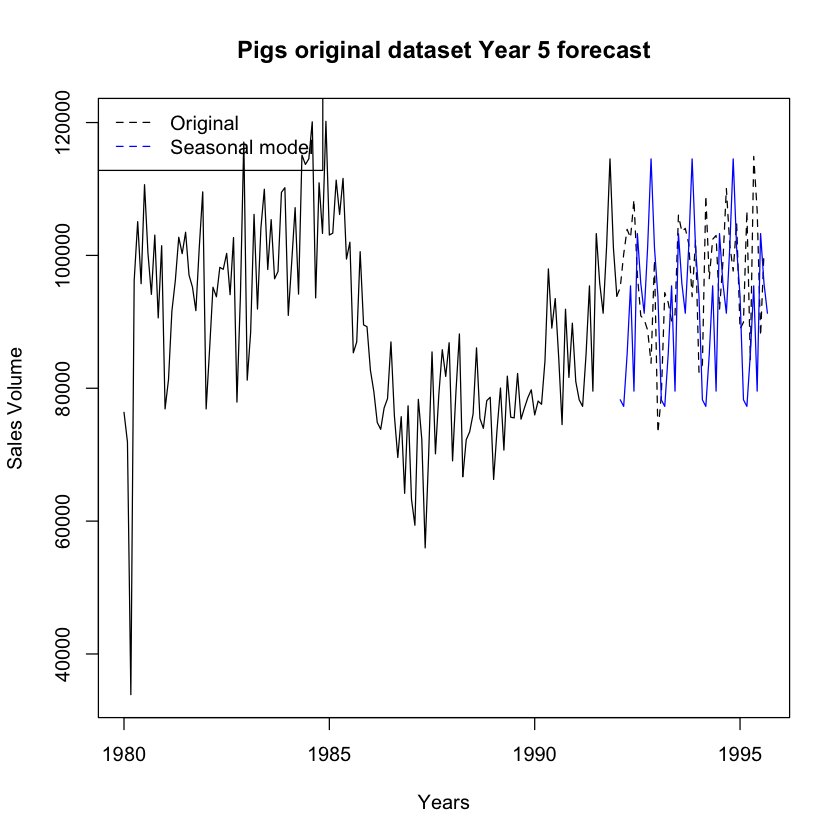

In [37]:
# Plot orginal dataset
ts.plot(
    train_pigs
    , test_pigs
    , plot.type="single"
    , lty=c(1:2)
    , main="Pigs original dataset Year 5 forecast"
    , ylab="Sales Volume"
    , xlab="Years")

lines(train_pigs_seasonal$mean, col="blue")
legend("topleft", legend=c("Original", "Seasonal model"), col=c("black", "blue"), lty=c(2:2))

Warning message:
In xy.coords(x = matrix(rep.int(tx, k), ncol = k), y = x, log = log): NAs introduced by coercionWarning message:
In xy.coords(x, y): NAs introduced by coercion

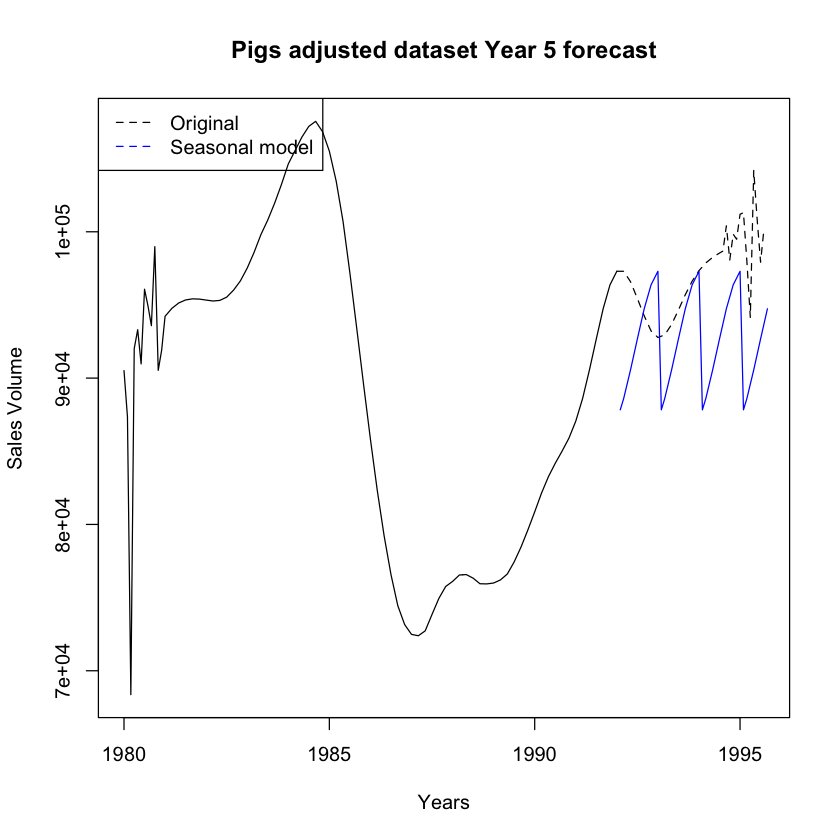

In [38]:
#Plot seasonally adjusted dataset
ts.plot(
    train_pigs_sa
    , test_pigs_sa
    , plot.type="single"
    , lty=c(1:2)
    , main="Pigs adjusted dataset Year 5 forecast"
    , ylab="Sales Volume"
    , xlab="Years")

lines(train_pigs_seasonal_sa$mean, col="blue")
legend("topleft", legend=c("Original", "Seasonal model"), col=c("black", "blue"), lty=c(2:2))

In [39]:
print("ORIGINAL")
accuracy(train_pigs_seasonal, test_pigs)

[1] "ORIGINAL"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,278.3459,13416.49,9966.857,-0.7436536,11.63848,1.0000,0.5392281,NA
Test set,4417.7674,15187.77,12076.837,3.6363734,12.43702,1.2117,0.1727455,1.237699


In [40]:
print("ADJUSTED")
accuracy(train_pigs_seasonal_sa, test_pigs)

[1] "ADJUSTED"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,201.5251,8572.279,6285.754,-0.2385196,7.282382,1.000000,0.9342802,NA
Test set,4043.6631,10655.470,8770.529,3.2553525,9.017030,1.395303,0.2184179,0.8822209
